source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [9]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [10]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR


Text(0, 0.5, 'Likes')

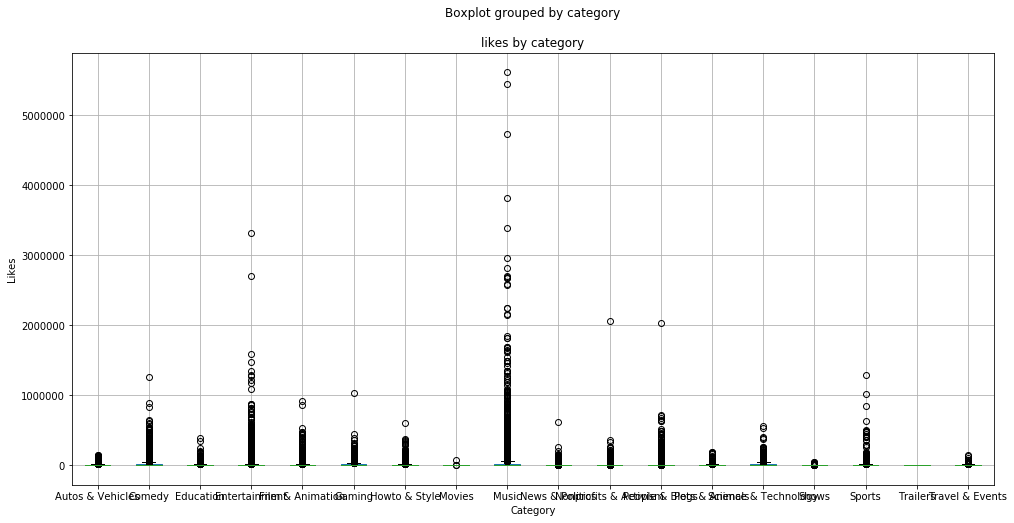

In [11]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca() # define axis
df[['likes','category']].boxplot(by = 'category', ax = ax)
ax.set_title('likes by category')
ax.set_xlabel('Category')
ax.set_ylabel('Likes')

In [12]:
fre_df = pd.DataFrame(df.groupby([df.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()


(   level_0 country  title
 0   171148      US      1
 1    57055      RU      1
 2    57053      RU      1
 3    57052      RU      1
 4    57051      RU      1,         level_0 country  title
 171144   114097      MX      1
 171145   114096      MX      1
 171146   114095      MX      1
 171147   114094      MX      1
 171148        0      FR      1)

Text(0, 0.5, 'Likes')

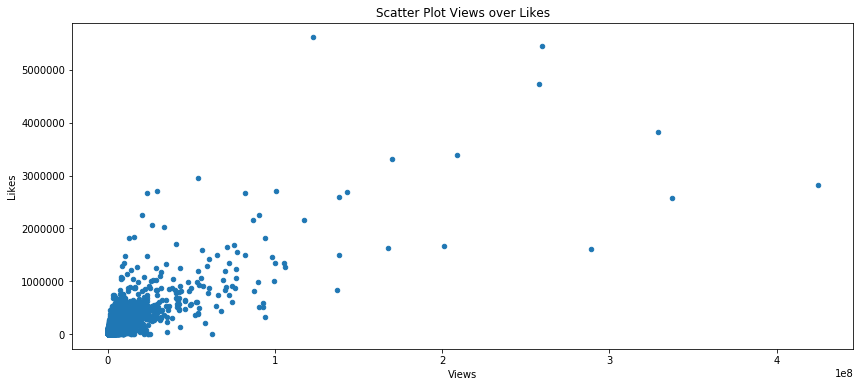

In [13]:
fig = plt.figure(figsize=(14, 6)) # define plot area
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'views', y = 'likes', ax = ax)
ax.set_title('Scatter Plot Views over Likes')
ax.set_xlabel('Views')
ax.set_ylabel('Likes')

Text(0, 0.5, 'Likes')

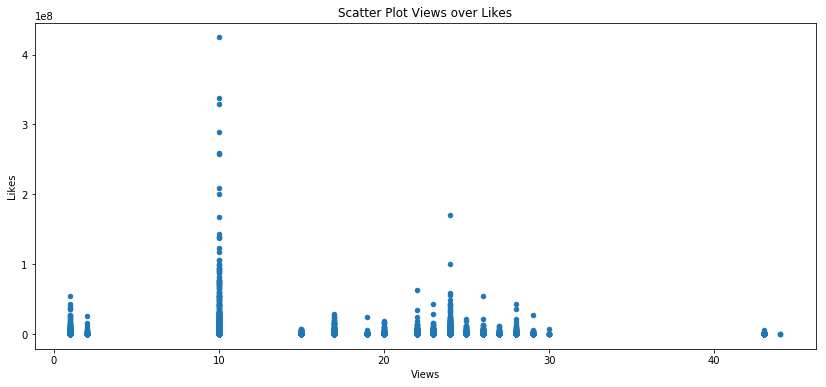

In [15]:
fig = plt.figure(figsize=(14, 6)) # define plot area
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'category_id', y = 'views', ax = ax)
ax.set_title('Scatter Plot Views over Likes')
ax.set_xlabel('Views')
ax.set_ylabel('Likes')

Text(0, 0.5, 'Comment Count')

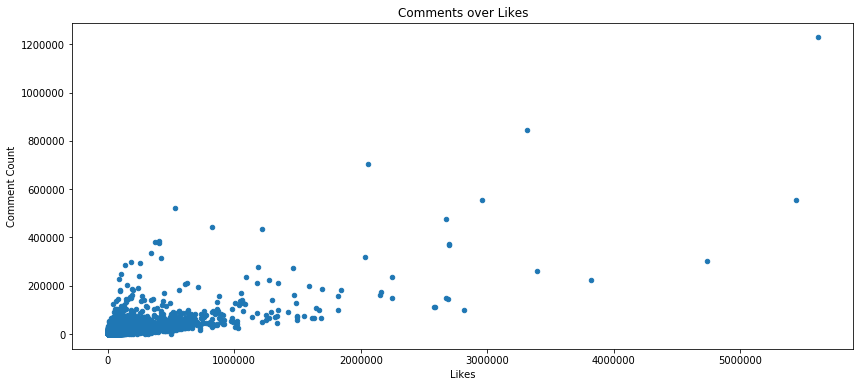

In [16]:
fig = plt.figure(figsize=(14, 6)) # define plot area
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'likes', y = 'comment_count', ax = ax)
ax.set_title('Comments over Likes')
ax.set_xlabel('Likes')
ax.set_ylabel('Comment Count')

Text(0, 0.5, 'Likes')

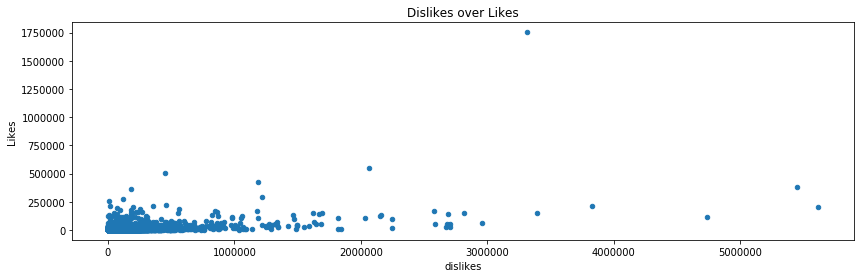

In [17]:
fig = plt.figure(figsize=(14, 4)) # define plot area
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'likes', y = 'dislikes', ax = ax)
ax.set_title('Dislikes over Likes')
ax.set_xlabel('dislikes')
ax.set_ylabel('Likes')

Text(0, 0.5, 'Dislikes')

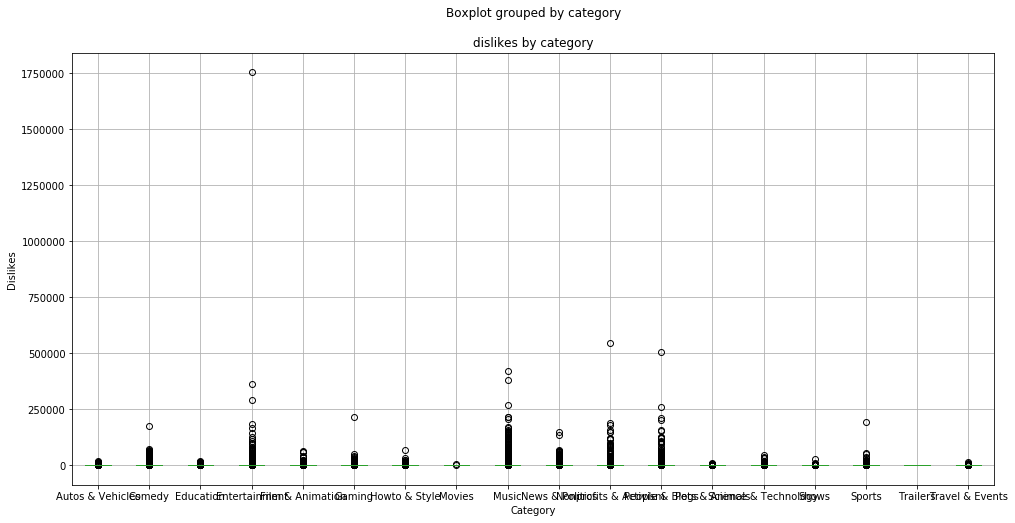

In [18]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca() # define axis
df[['dislikes','category']].boxplot(by = 'category', ax = ax)
ax.set_title('dislikes by category')
ax.set_xlabel('Category')
ax.set_ylabel('Dislikes')

Text(0, 0.5, 'Likes')

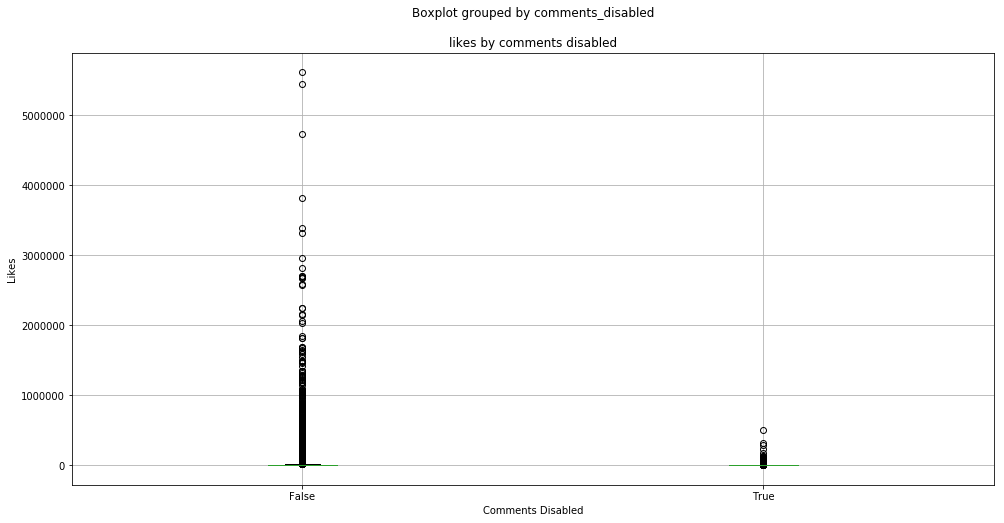

In [19]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca() # define axis
df[['likes','comments_disabled']].boxplot(by = 'comments_disabled', ax = ax)
ax.set_title('likes by comments disabled')
ax.set_xlabel('Comments Disabled')
ax.set_ylabel('Likes')

Text(0, 0.5, 'Dislikes')

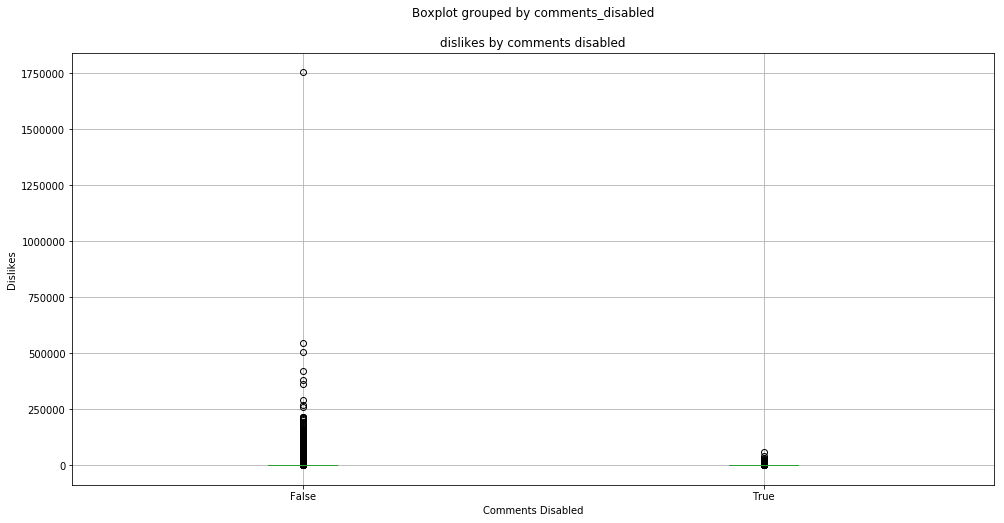

In [20]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca() # define axis
df[['dislikes','comments_disabled']].boxplot(by = 'comments_disabled', ax = ax)
ax.set_title('dislikes by comments disabled')
ax.set_xlabel('Comments Disabled')
ax.set_ylabel('Dislikes')

Text(0, 0.5, 'Views')

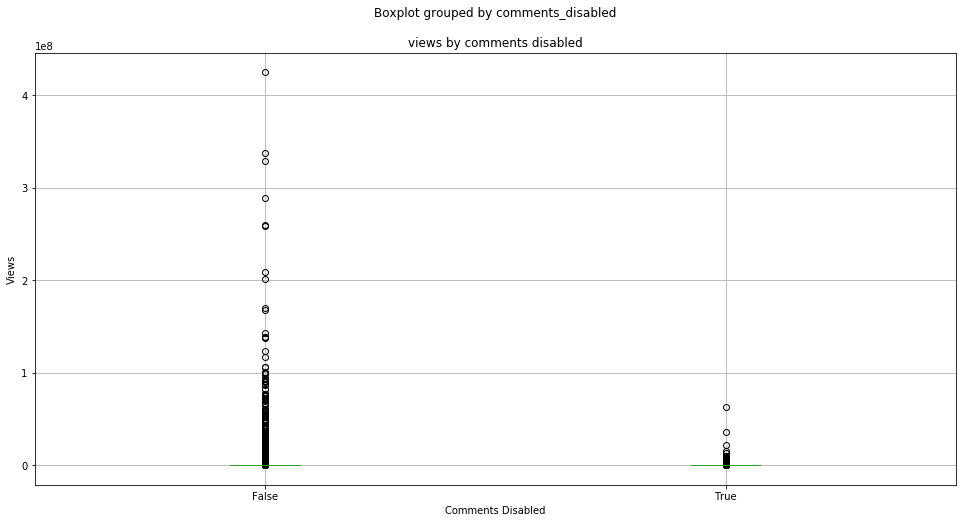

In [21]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca() # define axis
df[['views','comments_disabled']].boxplot(by = 'comments_disabled', ax = ax)
ax.set_title('views by comments disabled')
ax.set_xlabel('Comments Disabled')
ax.set_ylabel('Views')

In [23]:
df.sort_values('views')

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
82903,kz9Q2oALmWE,2018-02-25,Россия - Германия. Счет 4:3. Победа нашей сбор...,Alexander Redking,17,Sports,2018-02-25,06:57:15,"новости|""события""|""спорт""|""хоккей""|""Олимпиада""...",153,12,2,1,https://i.ytimg.com/vi/kz9Q2oALmWE/default.jpg,False,False,False,Источник: https://twitter.com/sport_fm/status/...,RU
10310,AH9CPLoIWu4,2017-11-26,RESUMEN CELAYA VS ALEBRIJES ASCENSO MX 2017,Ascenso MX,17,Sports,2017-11-26,06:05:11,"RESUMEN CELAYA VS ALEBRIJES ASCENSO MX 2017|""R...",157,16,3,7,https://i.ytimg.com/vi/AH9CPLoIWu4/default.jpg,False,False,False,RESUMEN CELAYA VS ALEBRIJES SEMIFINAL VUELTA A...,MX
82910,8_xuskv0SVw,2018-02-25,РОССИЯ - ГЕРМАНИЯ ГОЛЫ И ЛУЧШИЕ МОМЕНТЫ,Sport Life,22,People & Blogs,2018-02-25,06:58:40,"Олимпиада|""2018""|""Хоккей""|""Россия Германия Хок...",163,15,3,5,https://i.ytimg.com/vi/8_xuskv0SVw/default.jpg,False,False,False,ОЛИМПИАДА 2018 РОССИЯ ГЕРМАНИЯ СМОТРЕТЬ ОНЛАЙН...,RU
80823,p3YzdrKZzAw,2018-02-22,Анисимов забил с паса Кейна,NHL.COM/RU,17,Sports,2018-02-22,05:23:46,"Артем Анисимов|""НХЛ""|""Хоккей""",164,15,0,1,https://i.ytimg.com/vi/p3YzdrKZzAw/default.jpg,False,False,False,Артем Анисимов с близкого расстояния поразил в...,RU
143981,IFUVQf_x3vU,2018-05-11,Por Amar Sin Ley Capitulo 64 parte 4/4 - JUEVES,Marina Rios,24,Entertainment,2018-05-11,03:47:40,"hijas|""de""|""la""|""luna""|""las""|""juanas""|""ines""|""...",255,20,2,6,https://i.ytimg.com/vi/IFUVQf_x3vU/default.jpg,False,False,False,Para ver las siguientes partes solo le dan cli...,MX
80939,mhALzepKrTc,2018-02-22,Exatlon Avance programa 94 ¿Juego por la super...,Trend Tv,22,People & Blogs,2018-02-22,05:07:00,"exatlón|""exatlón méxico""|""Ana lago""|""ana lago ...",269,29,4,27,https://i.ytimg.com/vi/mhALzepKrTc/default.jpg,False,False,False,"Avance del programa 94 del Exatlón México, ¿po...",MX
98577,84auGGyG7rw,2018-03-15,France: Famous climber Alain Rober scales skys...,No Comment TV,25,News & Politics,2018-03-14,19:18:37,"performance""|""Extreme Sports",284,3,0,0,https://i.ytimg.com/vi/84auGGyG7rw/default.jpg,False,False,False,Famous French climber Alain Robert escalated a...,FR
146453,gnHIBeDg0Vk,2018-05-14,Omar Chaparro dedica palabras de aliento a Adr...,Videostendencias,22,People & Blogs,2018-05-13,16:17:05,"Omar chaparro|""dedica""|""palabras""|""de""|""alient...",302,29,2,1,https://i.ytimg.com/vi/gnHIBeDg0Vk/default.jpg,False,False,False,TE INVITAMOS A UNIRTE A NUESTRO NUEVO CANAL T...,MX
74770,6qVIVknsVmI,2018-02-15,Цымбалюк Романовскую призвали оставить Джигарх...,News Online,25,News & Politics,2018-02-15,12:04:46,"самые свежие новости|""last news""|""world news""|...",315,39,6,40,https://i.ytimg.com/vi/6qVIVknsVmI/default.jpg,False,False,False,Цымбалюк Романовскую призвали оставить Джигарх...,RU
58301,r0AXEVlTfgM,2018-01-26,LA ULTIMA de Enamorandonos 25 de ENERO DEL 201...,VIRAL SHOW,24,Entertainment,2018-01-26,05:17:03,"la|""ultima""|""de""|""enamorandonos""|""25""|""enero""|...",328,14,27,2,https://i.ytimg.com/vi/r0AXEVlTfgM/default.jpg,False,False,False,LA ULTIMA de Enamorandonos 25 de ENERO DEL 201...,MX


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002C2589DE80>]],
      dtype=object)

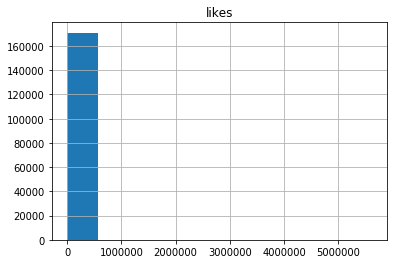

In [25]:
df.head()
df_simple = df[['video_id', 'category', 'likes']]
df_simple.hist()

# How to select rows in a column

In [26]:
df_all_timestamps[df_all_timestamps['country'].isin(['US','MX','CA'])]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
36,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,News & Politics,2017-11-13,07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103761,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,MX
37,O9g-hqEnfUo,2017-11-14,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,Noticias Mundiales 2017,22,People & Blogs,2017-11-12,22:23:08,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 210...,43849,111,49,18,https://i.ytimg.com/vi/O9g-hqEnfUo/default.jpg,False,False,False,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,MX
38,d9ndEyk2lBw,2017-11-14,Regime forces use UR-77 mine clearence charges...,News & Politics #17,24,Entertainment,2017-11-11,18:20:21,"Insurgency|""Jobar""|""Damascus""|""Damascus Govern...",151624,106,35,53,https://i.ytimg.com/vi/d9ndEyk2lBw/default.jpg,False,False,False,Regime forces use UR-77 mine clearence charges...,MX
39,0pNCxK0Hdl8,2017-11-14,DECORACIONES PARA NAVIDAD - IDEAS PARA DECORAR...,Silvia en tu Vida,1,Film & Animation,2017-11-13,15:00:00,"DECORACIONES PARA NAVIDAD|""IDEAS PARA DECORAR ...",11553,1225,44,276,https://i.ytimg.com/vi/0pNCxK0Hdl8/default.jpg,False,False,False,Buenos días Reynas !! Hoy les traigo el\nPrime...,MX
40,JzCsM1vtn78,2017-11-14,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,Entertainment,2017-11-12,20:19:24,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292841,4124,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,MX
41,Dx7S34lNt6A,2017-11-14,PARA TI 🎁...con todo el amor de mi corazón Ábrelo,Frases de Amor,22,People & Blogs,2017-11-13,13:00:01,"frases de amor|""frases bonitas""|""frases de amo...",41887,1138,48,39,https://i.ytimg.com/vi/Dx7S34lNt6A/default.jpg,False,False,False,Para ti 🎁... con todo el amor de mi corazón Áb...,MX
42,QSwlPz3ruYA,2017-11-14,Caballo Sereno despide emotivamente a su dueño...,top virar,22,People & Blogs,2017-11-13,17:12:40,Caballo Sereno despide emotivamente a su dueño...,11633,191,13,5,https://i.ytimg.com/vi/QSwlPz3ruYA/default.jpg,False,False,False,"APOYAME EN PATREON, ES IMPORTANTE: https://www...",MX
43,Nfd31XfFZ94,2017-11-14,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO",Aaron Echeverria,22,People & Blogs,2017-11-13,03:59:04,"hotspanish|""hotspanish vlogs""|""video oficial""|...",61222,3982,172,448,https://i.ytimg.com/vi/Nfd31XfFZ94/default.jpg,False,False,False,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO\n...",MX
44,jRl689eyaWg,2017-11-14,AYÚDAME SEÑOR #Reflexión,lili1623,22,People & Blogs,2017-11-13,13:30:03,"ayúdame señor|""reflexion""|""decir la verdad""|""d...",6143,727,13,19,https://i.ytimg.com/vi/jRl689eyaWg/default.jpg,False,False,False,AYÚDAME SEÑOR #Reflexión\nSUSCRÍBETE: http://g...,MX


In [27]:
df_all_timestamps[df_all_timestamps['views'].lt(10000)]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
12,hWtTJ3Q37rY,2017-11-14,MAGIE - IL FAIT APPARAÏTRE UN AVION DEVANT 230...,Cyril Ayrau,24,Entertainment,2017-11-13,05:54:40,"CYRIL AYRAU""|""Magicien Bergerac""|""Apparition a...",5114,34,1,11,https://i.ytimg.com/vi/hWtTJ3Q37rY/default.jpg,False,False,False,Cyril Ayrau Le Magicien de Bergerac fait appar...,FR
18,RKgk0DXZCvQ,2017-11-14,Réalité 3 Fatou Barcelon Herman Belvie Coquett...,esepelisa,1,Film & Animation,2017-11-13,16:00:05,"esepelisa""|""theatre congolais""|""theatre""|""rdc""...",6708,98,4,31,https://i.ytimg.com/vi/RKgk0DXZCvQ/default.jpg,False,False,False,"ESEPELISA présente: Réalité, la nouveauté 2017...",FR
19,O7JJllvepts,2017-11-14,Michel Sardou : Les révélations inédit de Loua...,koi de neuf? Buzz,24,Entertainment,2017-11-13,00:04:15,"Michel Sardou""|""Louane Emera""|""Je vole",7709,15,7,6,https://i.ytimg.com/vi/O7JJllvepts/default.jpg,False,False,False,Michel Sardou tacle Louane Emera : Elle dit de...,FR
23,xBwL10BMXeI,2017-11-14,Kurt Volker et la stratégie américaine en UKra...,Stratpol,25,News & Politics,2017-11-07,17:32:08,"ukraine""|""volker""|""donbass""|""kurt volker""|""xav...",3609,47,4,0,https://i.ytimg.com/vi/xBwL10BMXeI/default.jpg,True,False,False,La stratégie américaine pour l'Ukraine n'a pas...,FR
26,O90_g03eo2I,2017-11-14,L'Antidote - Dopage au quotidien : une béquill...,canal9valais,25,News & Politics,2013-10-18,12:35:33,"Valais""|""Canal9""|""Canal 9""|""télévision""|""telev...",3333,2,0,1,https://i.ytimg.com/vi/O90_g03eo2I/default.jpg,False,False,False,Dopage au quotidien : une béquille chimique\n ...,FR
27,8bSyJzEC1vo,2017-11-14,Débriefing F1 - GP du Brésil 2017,Motorsport tv France,2,Autos & Vehicles,2017-11-13,13:14:39,"motorsport""|""motorsport.tv""|""motorsport tv""|""d...",3329,169,3,45,https://i.ytimg.com/vi/8bSyJzEC1vo/default.jpg,False,False,False,"Abonnez-vous à Motorsport.tv, la chaîne des sp...",FR
31,7CdZE2zKQnk,2017-11-14,Carla Bruni-Sarkozy en larmes face à Delahouss...,Ça Zap !,24,Entertainment,2017-11-13,15:00:01,"ca zap""|""web""|""zapping web""|""lezapping""|""zappi...",9077,97,9,17,https://i.ytimg.com/vi/7CdZE2zKQnk/default.jpg,False,False,False,Abonnez-vous ici : https://www.youtube.com/cha...,FR
32,icKOIAc4rAA,2017-11-14,Le client est roi… vraiment ? - Tout Compte Fa...,Tout Compte Fait,24,Entertainment,2017-11-13,08:05:51,"Julian Bugier""|""France 2""|""Tout Compte Fait""|""...",4326,68,2,12,https://i.ytimg.com/vi/icKOIAc4rAA/default.jpg,False,False,False,Les consommateurs sont-ils en train de prendre...,FR
44,jRl689eyaWg,2017-11-14,AYÚDAME SEÑOR #Reflexión,lili1623,22,People & Blogs,2017-11-13,13:30:03,"ayúdame señor|""reflexion""|""decir la verdad""|""d...",6143,727,13,19,https://i.ytimg.com/vi/jRl689eyaWg/default.jpg,False,False,False,AYÚDAME SEÑOR #Reflexión\nSUSCRÍBETE: http://g...,MX
45,Zw5jzd4BvBY,2017-11-14,Un dia muy movido|||||| ツ 🚗,pepenaker,15,Pets & Animals,2017-11-13,14:55:38,"peces|""truchas""|""modulo de leds""|""la marquesa""...",2244,305,6,81,https://i.ytimg.com/vi/Zw5jzd4BvBY/default.jpg,False,False,False,Dejen les cuento como estuvo mi dia.\n\nApoyam...,MX


In [28]:
df_USMXCA = df_all_timestamps[df_all_timestamps['country'].isin(['US','MX','CA'])]
df_USMXCA[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
36,1309699,103761,4613
37,43849,111,49
38,151624,106,35
39,11553,1225,44
40,4477587,292841,4124
41,41887,1138,48
42,11633,191,13
43,61222,3982,172
44,6143,727,13
